![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [42]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# workout csv
workout_data = pd.read_csv("./data/workout.csv")
workout_data = workout_data.dropna()
workout_data.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [44]:
# three_keywords csv
three_keywords_data = pd.read_csv("./data/three_keywords.csv")
three_keywords_data = three_keywords_data.dropna()
three_keywords_data.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [45]:
# workout_geo_data csv
workout_geo_data = pd.read_csv("./data/workout_geo.csv")
workout_geo_data = workout_geo_data.dropna()
workout_geo_data.head()

,country,workout_2018_2023
5,United States,100.0
12,Canada,86.0
18,Australia,77.0
22,New Zealand,73.0
23,Lebanon,73.0


In [46]:
# three_keywords_geo csv
three_keywords_geo_data = pd.read_csv("./data/three_keywords_geo.csv")
three_keywords_geo_data = three_keywords_geo_data.dropna()
three_keywords_geo_data.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
15,South Africa,41.0,33.0,26.0
16,Australia,30.0,34.0,36.0
22,Canada,40.0,27.0,33.0
23,Philippines,52.0,38.0,10.0
25,United Kingdom,34.0,36.0,30.0


Now that we imported the data our goal is to find the peak workout year

In [47]:
workout_worldwide_max = workout_data["workout_worldwide"].max()
print(workout_worldwide_max)
print(workout_data[workout_data["workout_worldwide"] == workout_worldwide_max])

100
      month  workout_worldwide
25  2020-04                100


In [48]:
year_str = "2020" # most searches for workouts were made in 2020 april

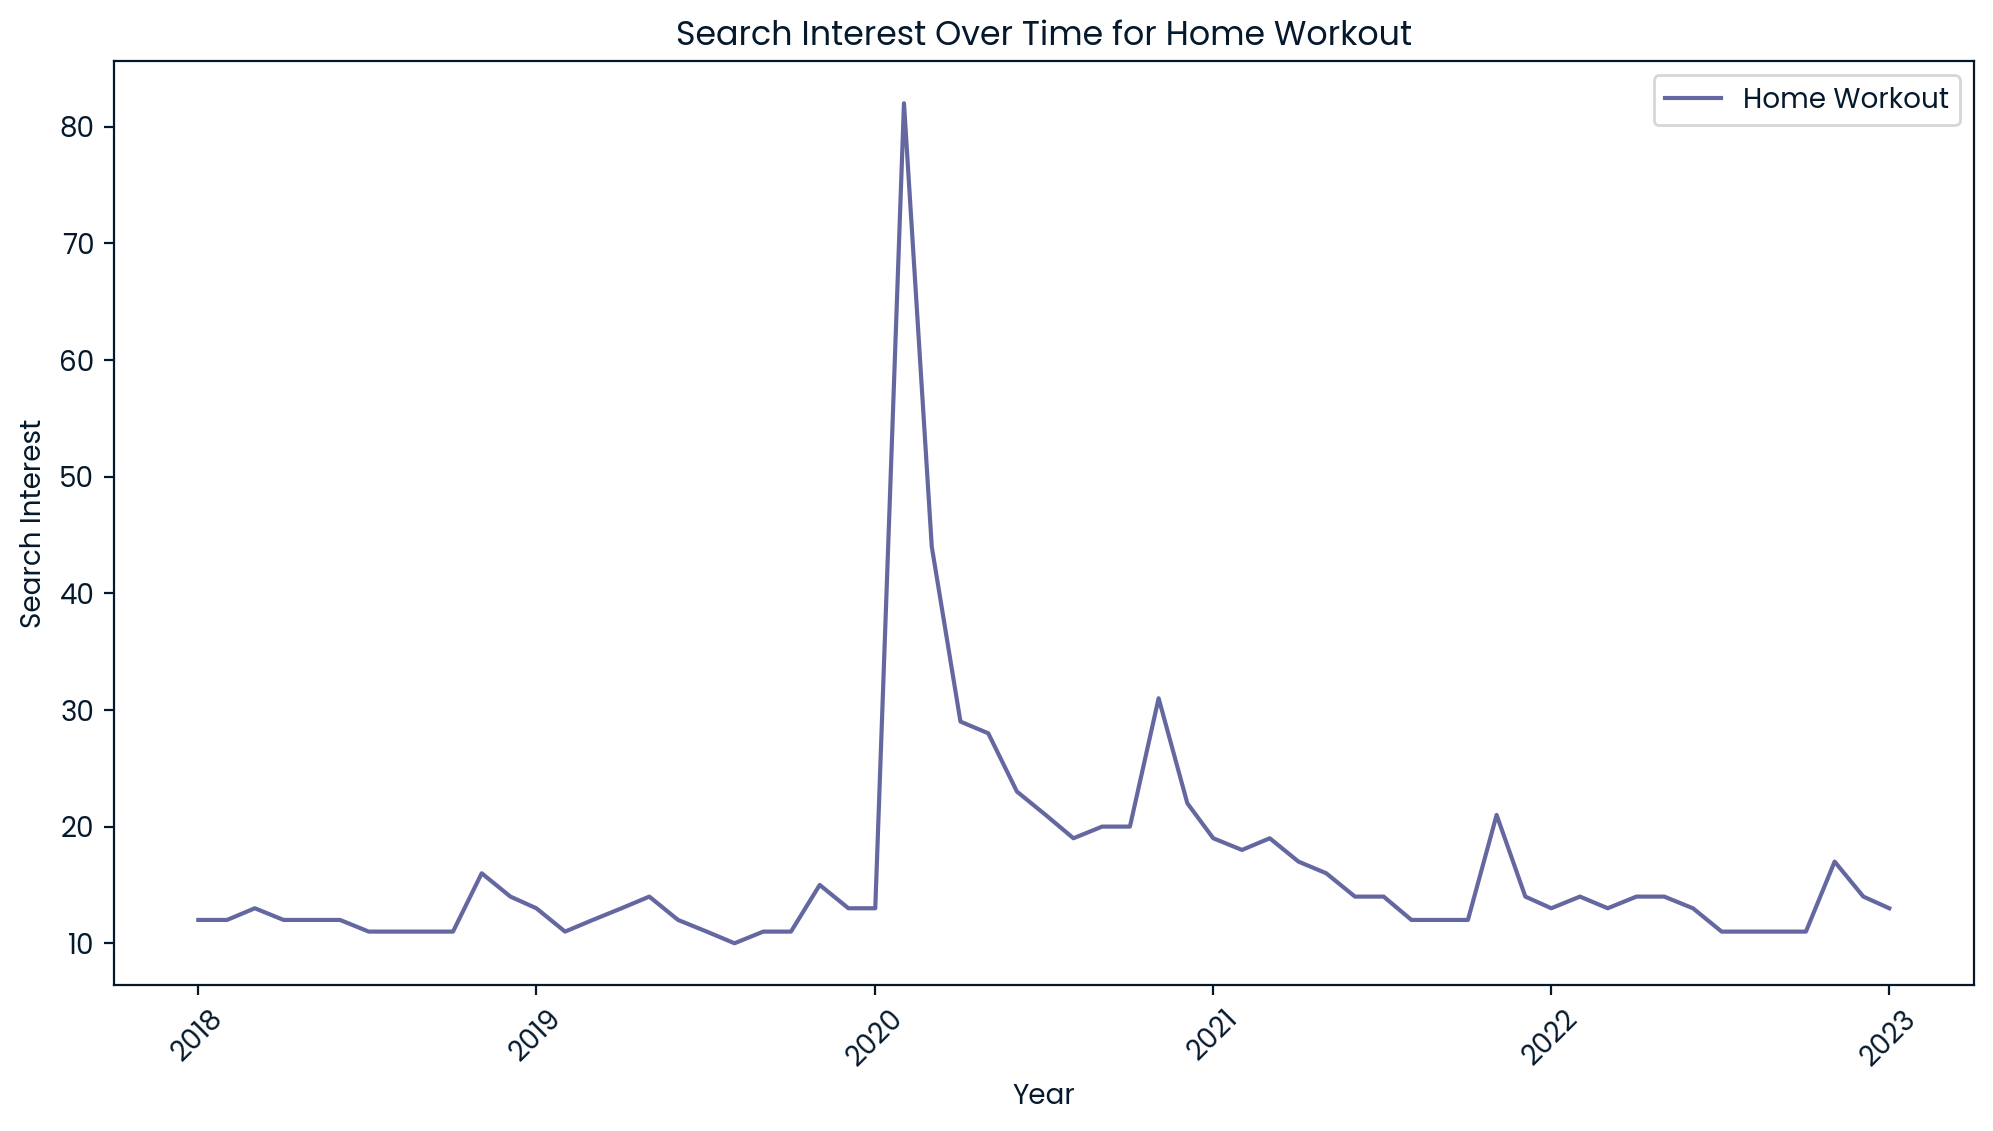

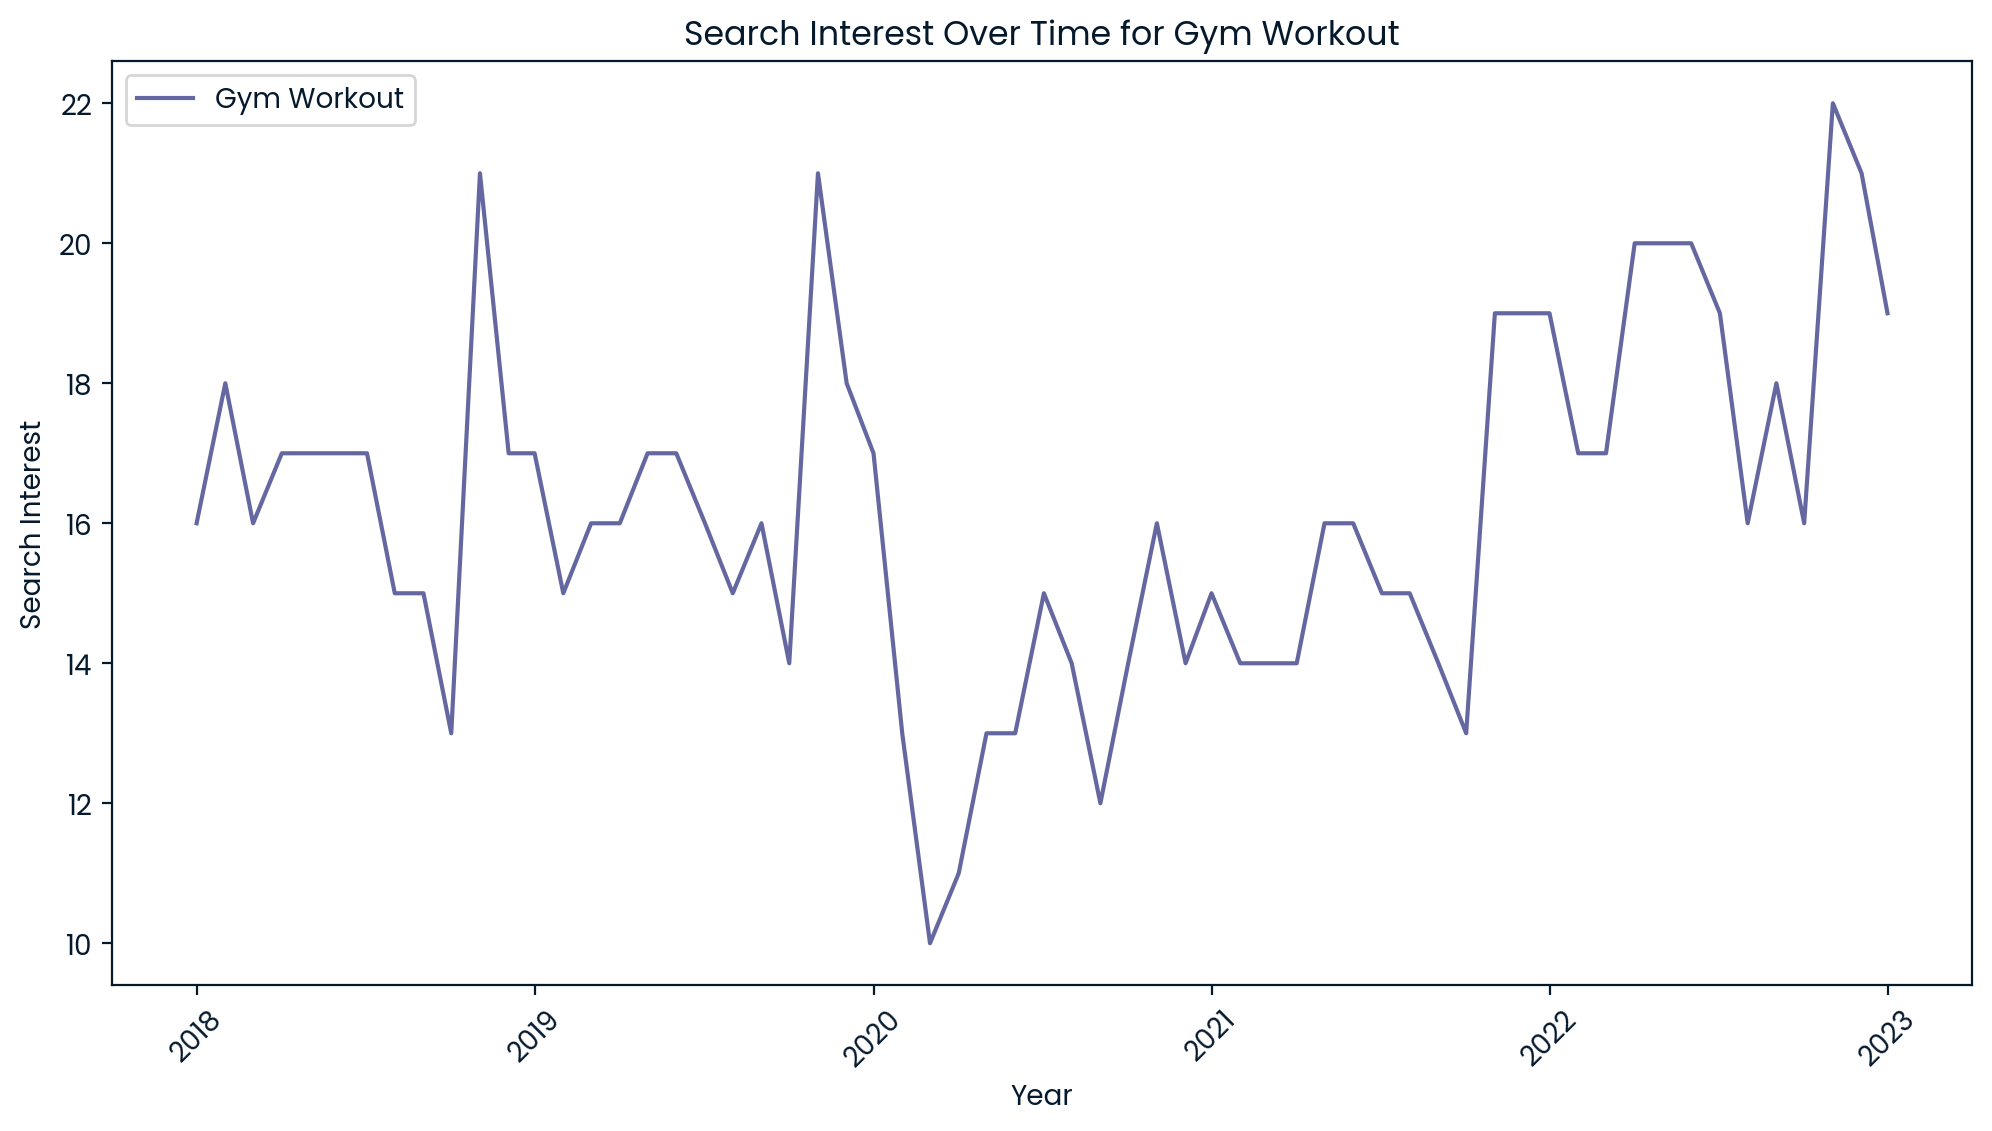

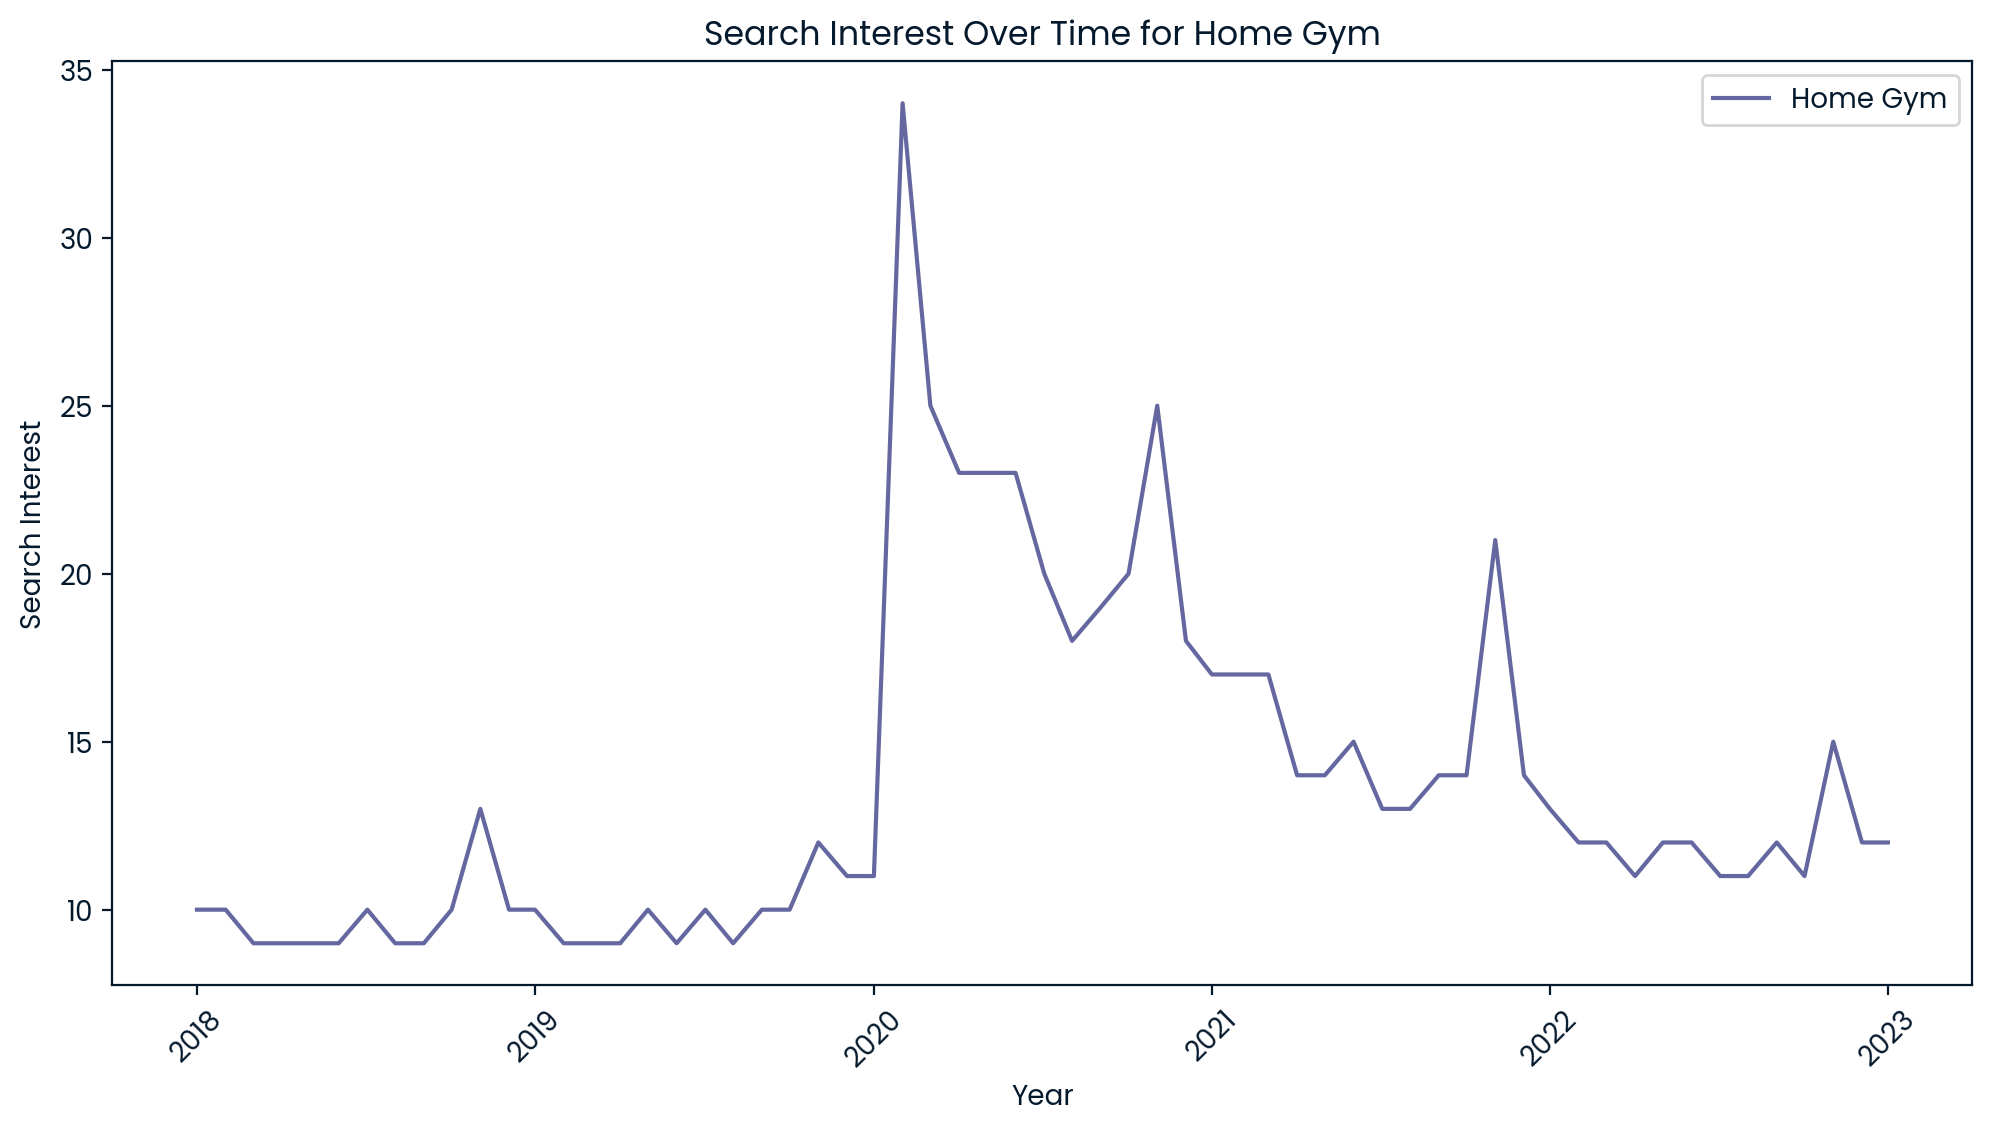

In [49]:
# Convert 'month' to datetime for better handling
three_keywords_data["month"] = pd.to_datetime(three_keywords_data["month"])

# Define a function to plot the data
def plot_keyword_trend(data, keyword, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["month"], data[keyword], label=title)
    plt.xlabel("Year")
    plt.ylabel("Search Interest")
    plt.title(f"Search Interest Over Time for {title}")
    plt.legend()
    plt.xticks(
        data["month"][::12],  # Show only the first month of each year
        data["month"].dt.year[::12],  # Extract the year
        rotation=45
    )
    plt.show()

# Plot Home Workout
plot_keyword_trend(three_keywords_data, "home_workout_worldwide", "Home Workout")

# Plot Gym Workout
plot_keyword_trend(three_keywords_data, "gym_workout_worldwide", "Gym Workout")

# Plot Home Gym
plot_keyword_trend(three_keywords_data, "home_gym_worldwide", "Home Gym")

In [50]:
peak_covid = "home_workout_worldwide"
current = "gym_workout_worldwide"

In [51]:
sorted_workout_geo = workout_geo_data.sort_values(by="workout_2018_2023", ascending=False)
print(sorted_workout_geo.head())

          country  workout_2018_2023
5   United States              100.0
12         Canada               86.0
18      Australia               77.0
22    New Zealand               73.0
23        Lebanon               73.0


In [52]:
top_country = "United States"

In [53]:
# Filter the data for the Philippines and Malaysia
philippines_data = three_keywords_geo_data[three_keywords_geo_data["Country"] == "Philippines"]
malaysia_data = three_keywords_geo_data[three_keywords_geo_data["Country"] == "Malaysia"]

# Compare the interest in home workouts between the two countries
philippines_home_workout = philippines_data["home_workout_2018_2023"].values[0]
malaysia_home_workout = malaysia_data["home_workout_2018_2023"].values[0]

# Determine which country has the highest interest in home workouts
if philippines_home_workout > malaysia_home_workout:
    home_workout_geo = "Philippines"
else:
    home_workout_geo = "Malaysia"

home_workout_geo

'Philippines'